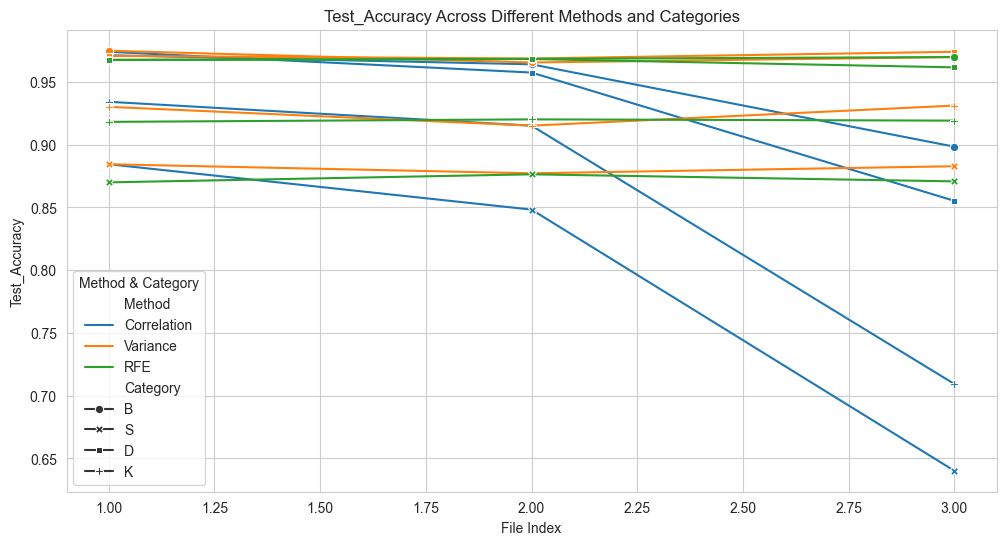

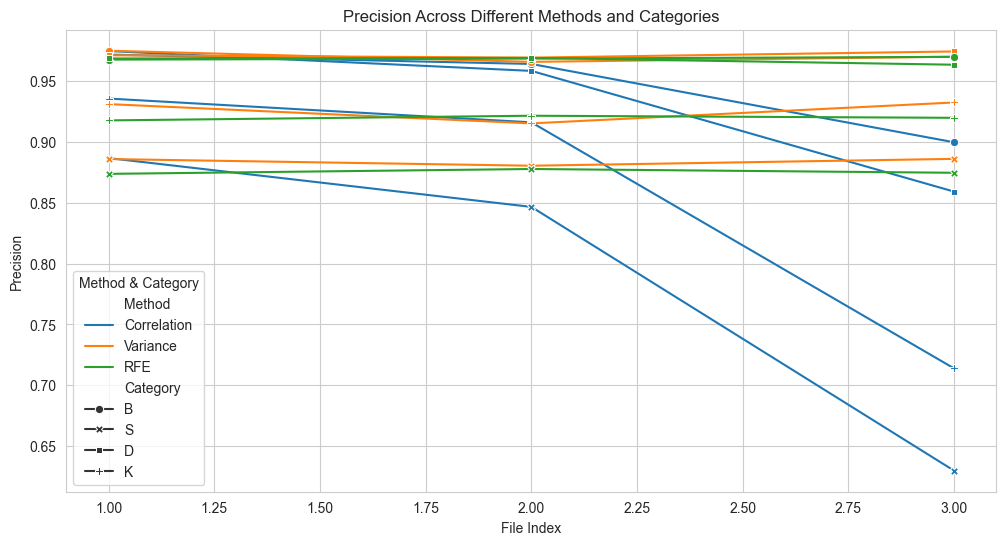

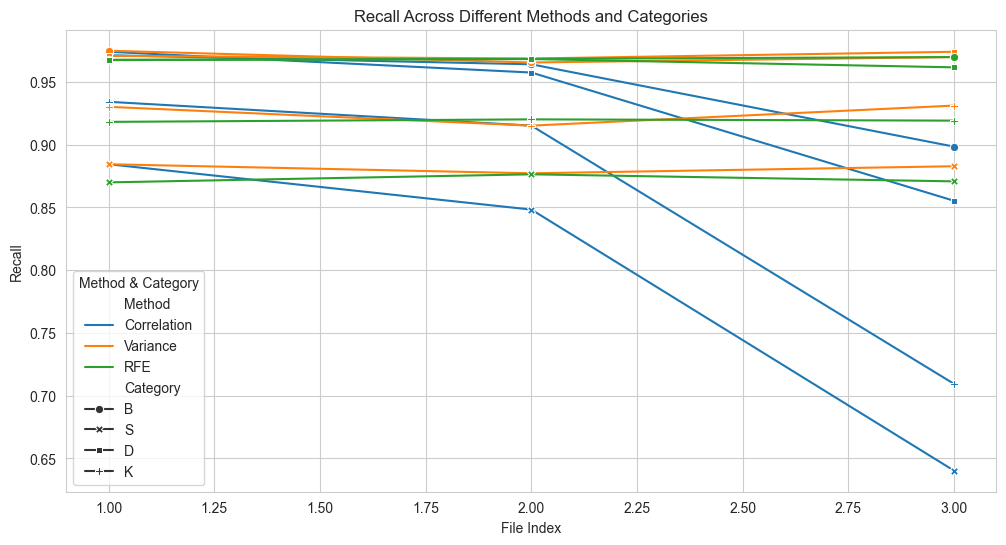

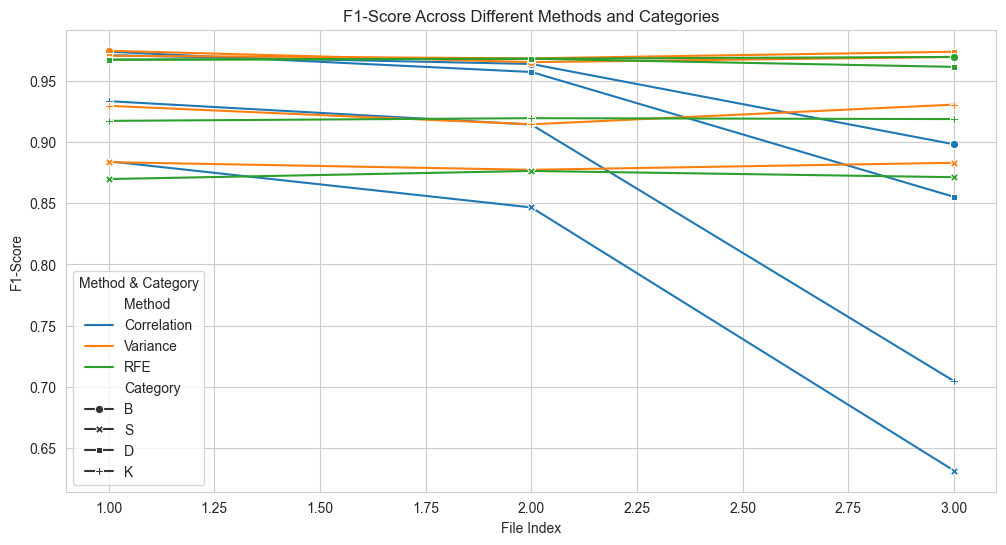

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv("model_training_results.csv")

# Define metrics to plot
metrics = ["Test_Accuracy", "Precision", "Recall", "F1-Score"]

# Set Seaborn style
sns.set_style("whitegrid")

# Create separate plots for each metric
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x="File_Index", y=metric, hue="Method", style="Category", markers=True, dashes=False)
    plt.title(f"{metric} Across Different Methods and Categories")
    plt.xlabel("File Index")
    plt.ylabel(metric)
    plt.legend(title="Method & Category")
    plt.show()


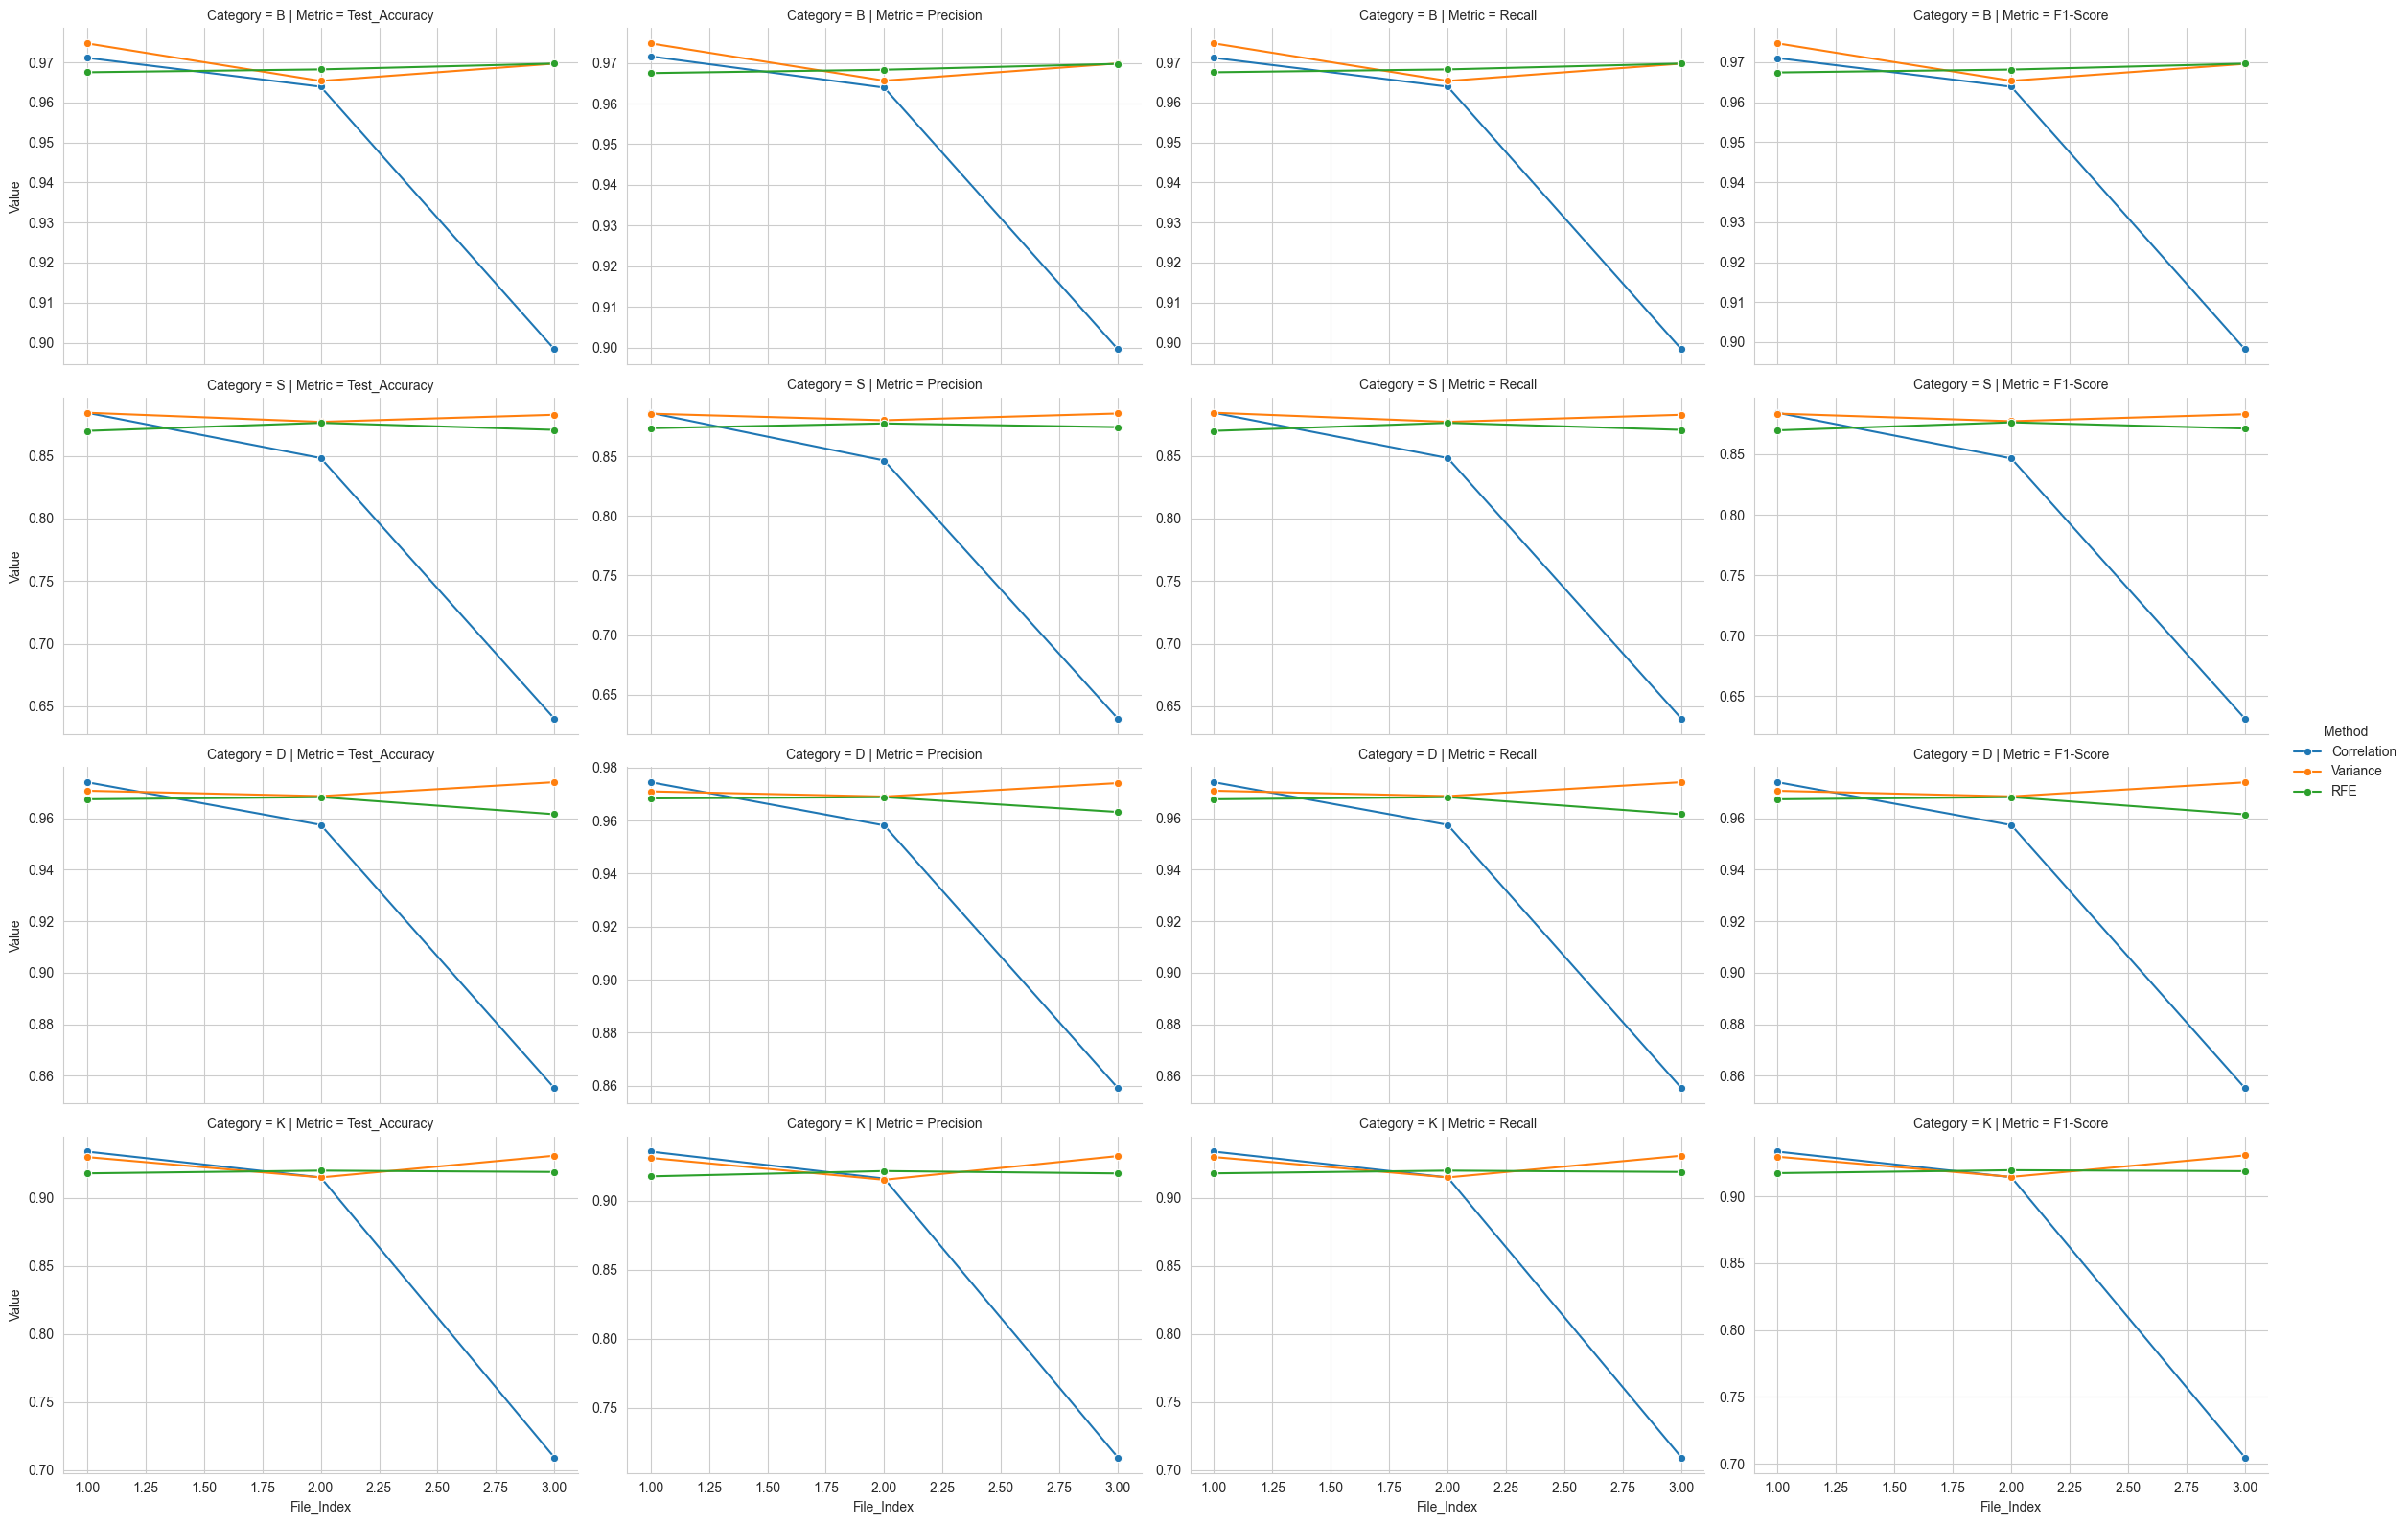

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data = pd.read_csv("model_training_results.csv")

# Melt the data to have all metrics in a single column for easy plotting
melted_data = data.melt(id_vars=["Method", "Category", "File_Index"], 
                        value_vars=["Test_Accuracy", "Precision", "Recall", "F1-Score"], 
                        var_name="Metric", 
                        value_name="Value")

# Create FacetGrid for multiple subplots
g = sns.FacetGrid(melted_data, col="Metric", hue="Method", row="Category", sharey=False, height=4, aspect=1.5)
g.map(sns.lineplot, "File_Index", "Value", marker="o")
g.add_legend()

plt.show()


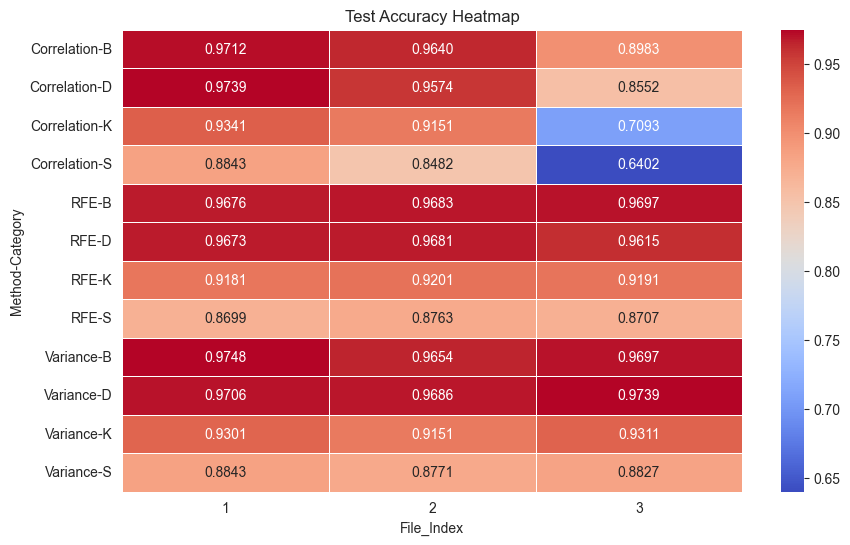

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a heatmap format
heatmap_data = data.pivot_table(index=["Method", "Category"], columns="File_Index", values="Test_Accuracy")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5)
plt.title("Test Accuracy Heatmap")
plt.show()
